In [5]:
import pandas as pd
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats, optimize
import random


In [6]:
number_of_agents = 200
effort_costs = pm.Lognormal.dist(mu=0.0,sd=0.5).random(size=number_of_agents)
def effort(c,τ):
    sol = optimize.minimize(lambda x: -(x*(1-τ)-c*x**2),1)
    return sol.x

In [8]:
effort_costs

array([1.05937461, 0.8426656 , 0.72037669, 1.31018897, 1.4317014 ,
       0.51684275, 0.38837217, 1.09729962, 1.0688649 , 0.68225241,
       1.10613575, 1.01196711, 0.24319474, 1.06842577, 1.41774002,
       0.7130089 , 1.37150359, 0.8850599 , 1.38716397, 1.5605243 ,
       1.23362575, 1.35239678, 1.32659042, 0.59224742, 0.78563805,
       1.30763474, 1.37931596, 1.14637709, 0.95144793, 1.47136002,
       1.24098405, 1.31378139, 0.91321208, 1.04416091, 0.91352559,
       0.82642392, 1.12947192, 0.55692009, 0.86600429, 0.859421  ,
       0.45263411, 0.92454121, 0.71038038, 0.80663374, 0.67700298,
       0.74057348, 0.88321783, 0.96626651, 0.58522665, 1.01461772,
       0.70778883, 0.84755522, 1.87363645, 1.69894959, 2.13321383,
       0.9912403 , 0.73689437, 0.52391118, 0.81322338, 0.56765363,
       0.94628224, 0.90602159, 0.71954774, 3.35707138, 1.01019379,
       1.84946809, 1.28449616, 0.4484179 , 1.5487784 , 0.56949408,
       0.83599041, 1.23732879, 0.8249333 , 1.35506347, 0.88163

In [7]:
def Welfare(τ,ρ):
    τ_0 = np.mean([τ*effort(c,τ) for c in effort_costs])
    return (np.sum([((1-τ)*effort(c,τ)+τ_0 - c*effort(c,τ)**2)**ρ for c in effort_costs]))**(1/ρ)

In [16]:
w = []

p = 1
for t in np.arange(0, 1, 0.01):
    #print(t, end=', ')
    w.append(Welfare(t,p))
    
print(w)

[55.07250768038214, 55.067000417147774, 55.0504786496725, 55.02294238139311, 54.98439161010884, 54.93482634874458, 54.87424656538341, 54.802652295499996, 54.720043515522576, 54.626420238838804, 54.52178245630236, 54.40613017721542, 54.27946339295484, 54.14178210299018, 53.993086327769035, 53.83337603756938, 53.66265124736886, 53.480911953317964, 53.28815815342405, 53.084389863567964, 52.86960706601652, 52.64380976596301, 52.40699799037955, 52.15917170344689, 51.900330877425084, 51.630475572915124, 51.34960579042599, 51.05772145477567, 50.75482265153387, 50.440909363278806, 50.11598156306272, 49.780039216301034, 49.43308241413136, 49.075111118928135, 48.70612525653492, 48.32612496534211, 47.93511015756618, 47.53308083829942, 47.120036997342396, 46.69597868203092, 46.26090586239392, 45.814818544982295, 45.357716687732676, 44.88960036878007, 44.41046955304803, 43.92032417951735, 43.41916435160633, 42.90699004195447, 42.38380121528237, 41.84959783240723, 41.304380007324944, 40.748147646068

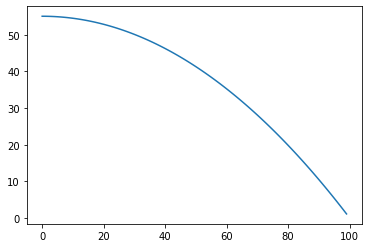

In [19]:
plt.plot(w)